# A short example of ctaplot functions 

In [1]:
import ctaplot
import numpy as np
import matplotlib.pyplot as plt

## Generate some dummy data

In [2]:
size = 100000
simu_energy = 10**np.random.uniform(-2, 2, size)
reco_energy = simu_energy**(0.9)
source_alt = 3.
source_az = 1.5
simu_alt = source_alt * np.ones(size)
simu_az = source_az * np.ones(size)
reco_alt = np.random.normal(loc=source_alt, scale=3e-3, size=size)
reco_az = np.random.normal(loc=source_az-0.005, scale=3e-3, size=size)

## Position reconstruction

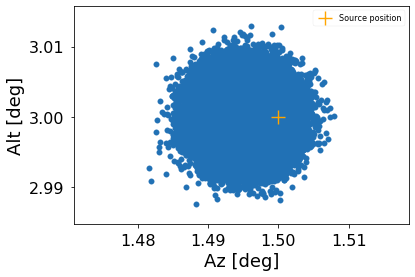

In [3]:
ctaplot.plot_field_of_view_map(reco_alt, reco_az, source_alt, source_az)

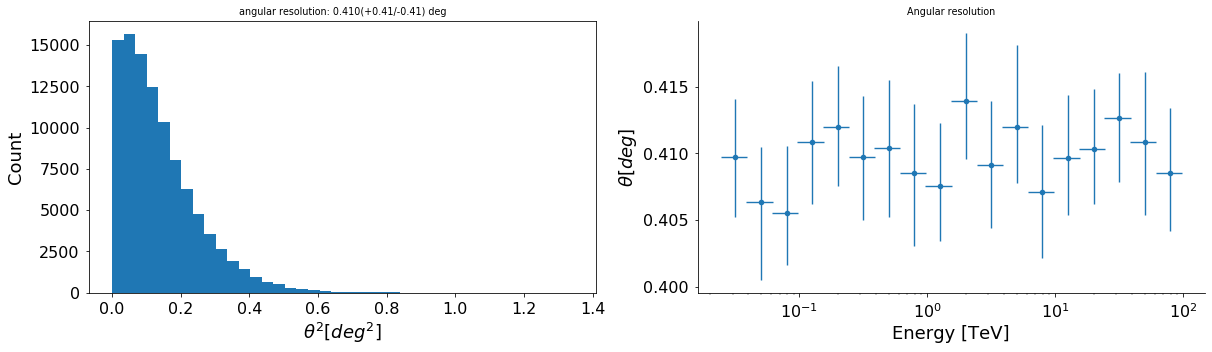

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
ctaplot.plot_theta2(reco_alt, reco_az, simu_alt, simu_az, bins=40, ax=axes[0])
ctaplot.plot_angular_resolution_per_energy(reco_alt, reco_az, simu_alt, simu_az, simu_energy, ax=axes[1])

Ok, the position is really not well reconstructed.   
But this is actually because of a bias in the reconstruction. We can ask for an automatic correction of this bias.

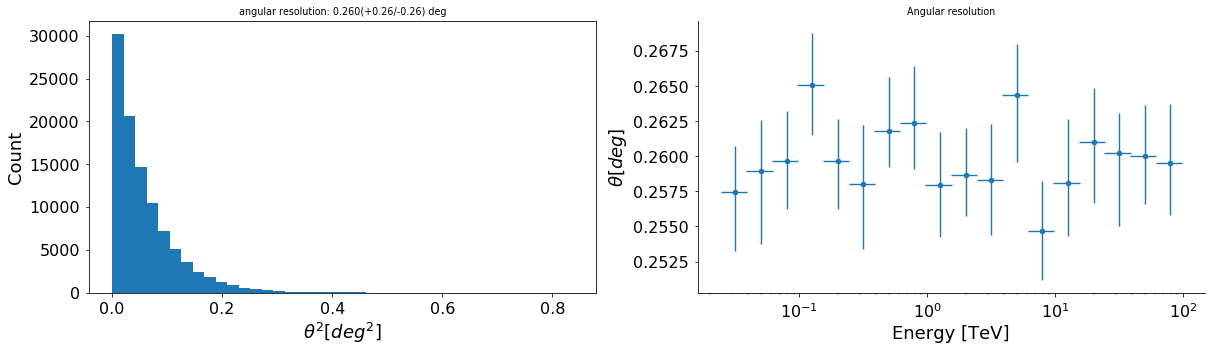

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
ctaplot.plot_theta2(reco_alt, reco_az, simu_alt, simu_az,
                    bins=40,
                    bias_correction=True,
                    ax=axes[0])

ctaplot.plot_angular_resolution_per_energy(reco_alt, reco_az, simu_alt, simu_az, simu_energy,
                                           bias_correction=True,
                                           ax=axes[1])

Now the angular resolution looks better, in agreement with the input scale of the Gaussian distribution.

## Energy reconstruction

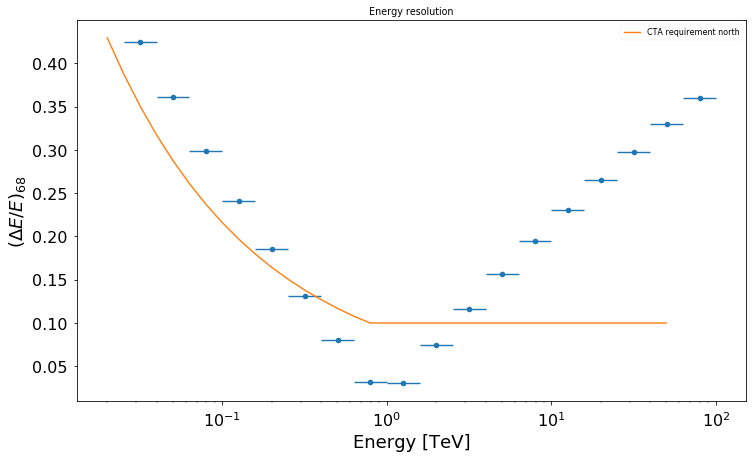

In [6]:
plt.figure(figsize=(12,7))
ax = ctaplot.plot_energy_resolution(simu_energy, reco_energy)
ctaplot.plot_energy_resolution_cta_requirement('north', ax=ax)
ax.legend()

**But you might want to study the energy resolution as a function of another variable...    
or to compute the resolution of other stuff**

In [7]:
new_variable = simu_energy * 2

bins, res = ctaplot.resolution_per_bin(new_variable, simu_energy, reco_energy,
                                       bins=np.logspace(-2,2,10),
                                       relative_scaling_method='s1')

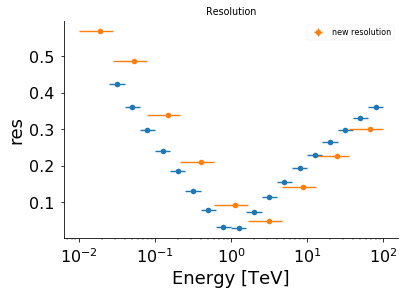

In [8]:
ax = ctaplot.plot_energy_resolution(simu_energy, reco_energy)
ctaplot.plot_resolution(bins, res, label='new resolution', ax=ax)
ax.legend()